In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [124]:
df = pd.read_csv("resultats-par-niveau-subcom-t1-france-entiere.csv")

# Formatting Dataframe

In [134]:
CANDIDATE_COLUMN_HEADERS = df.columns[~df.columns.str.contains("Unnamed")][-7:].copy()

def map_candidate_to_column(df):
    columns_no_name = df.columns[df.columns.str.contains("Unnamed")]
    for data in range(7,len(columns_no_name)+1,7):
        candidate_columns = columns_no_name[data-7:data]
        last_name = df[candidate_columns[2]]
        name = df[candidate_columns[3]]
        full_name = last_name.unique()[0] + "_" + name.unique()[0]
        yield full_name, candidate_columns

def format_candidate_columns(df, full_name, candidate_noname_columns):
    yield dict([[column_no_name,CANDIDATE_COLUMN_HEADERS[i]+"_"+full_name] for i,column_no_name in enumerate(candidate_noname_columns)])

In [136]:
correct_candidate_format = [format_candidate_columns(df,*candidate) for mapped_candidate in map_candidate_to_column(df)]
for candidate_headers in correct_candidate_format:
    for candidate_header in candidate_headers:
        df.rename(columns=dict(candidate_header),inplace=True)
df.head()

,Code du département,Libellé du département,Code de la commune,Libellé de la commune,Etat saisie,Inscrits,Abstentions,% Abs/Ins,Votants,% Vot/Ins,...,Voix_POUTOU_Philippe,% Voix/Ins_POUTOU_Philippe,% Voix/Exp_POUTOU_Philippe,N°Panneau_DUPONT-AIGNAN_Nicolas,Sexe_DUPONT-AIGNAN_Nicolas,Nom_DUPONT-AIGNAN_Nicolas,Prénom_DUPONT-AIGNAN_Nicolas,Voix_DUPONT-AIGNAN_Nicolas,% Voix/Ins_DUPONT-AIGNAN_Nicolas,% Voix/Exp_DUPONT-AIGNAN_Nicolas
0,01,Ain,1,L'Abergement-Clémenciat,Complet,645,108,16.74,537,83.26,...,3,0.47,0.58,12,M,DUPONT-AIGNAN,Nicolas,21,3.26,4.04
1,01,Ain,2,L'Abergement-de-Varey,Complet,213,38,17.84,175,82.16,...,3,1.41,1.75,12,M,DUPONT-AIGNAN,Nicolas,0,0.00,0.00
2,01,Ain,4,Ambérieu-en-Bugey,Complet,8765,2078,23.71,6687,76.29,...,43,0.49,0.66,12,M,DUPONT-AIGNAN,Nicolas,181,2.07,2.76
3,01,Ain,5,Ambérieux-en-Dombes,Complet,1282,234,18.25,1048,81.75,...,2,0.16,0.19,12,M,DUPONT-AIGNAN,Nicolas,27,2.11,2.63
4,01,Ain,6,Ambléon,Complet,103,23,22.33,80,77.67,...,0,0.00,0.00,12,M,DUPONT-AIGNAN,Nicolas,1,0.97,1.30


<center><b>Notes to bear in mind</b></center>

* The ``range(7,len(columns_no_name)+1,7)`` comes from the fact that when exploring the data, we can notice that all the columns that are labelled as ``Unnamed`` contain the candidate data. Each candidate has 7 column which means that every time we move 7 positions, from when the first ``Unnamed`` column starts, we get different candidate data.
<br>
<br>
* ``map_candidate_to_column`` maps each individual candidate to the ``Unnamed`` columns that belong them, and ``format_candidate_column`` formats the list into a dict so that we can rename the columns.

# Data Analysis

## Dataframe with candidate votes per department

In [151]:
mask=df.transpose().index.str.contains("Voix_")
voix_rows = df.transpose().index[mask]
votes_dep = df.groupby("Libellé du département").sum().transpose().loc[voix_rows,:]
votes_dep

Libellé du département,Ain,Aisne,Allier,Alpes-Maritimes,Alpes-de-Haute-Provence,Ardennes,Ardèche,Ariège,Aube,Aude,...,Val-d'Oise,Val-de-Marne,Var,Vaucluse,Vendée,Vienne,Vosges,Wallis et Futuna,Yonne,Yvelines
Voix_ROUSSEL_Fabien,5938.0,5985.0,8119.0,8883.0,2721.0,3010.0,5710.0,2701.0,3094.0,5622.0,...,10060.0,14954.0,10672.0,6234.0,8153.0,6412.0,3850.0,34.0,4022.0,11721.0
Voix_MACRON_Emmanuel,92206.0,58861.0,49704.0,139966.0,20800.0,31667.0,45352.0,18070.0,38318.0,43104.0,...,138166.0,171409.0,142335.0,66883.0,149587.0,67831.0,51477.0,2115.0,42616.0,246057.0
Voix_LASSALLE_Jean,10876.0,6489.0,7780.0,12784.0,4309.0,4081.0,9033.0,7532.0,3787.0,12382.0,...,9101.0,8944.0,17784.0,9843.0,13039.0,7741.0,7210.0,78.0,5355.0,13687.0
Voix_LE PEN_Marine,86755.0,104677.0,50314.0,149218.0,26010.0,48227.0,49592.0,21958.0,49308.0,64027.0,...,91081.0,69599.0,183287.0,89411.0,97280.0,54216.0,65676.0,579.0,55162.0,101395.0
Voix_ZEMMOUR_Éric,27530.0,18306.0,12361.0,78329.0,7925.0,8775.0,14199.0,5820.0,11373.0,18434.0,...,37564.0,43430.0,79329.0,30473.0,25663.0,11939.0,13195.0,118.0,12941.0,64407.0
Voix_MÉLENCHON_Jean-Luc,57832.0,41271.0,31013.0,92814.0,21856.0,22285.0,42836.0,23908.0,22482.0,42039.0,...,175666.0,192427.0,89272.0,63045.0,60524.0,49162.0,32690.0,501.0,31599.0,168583.0
Voix_HIDALGO_Anne,5644.0,2993.0,3280.0,5424.0,1396.0,1738.0,4189.0,3208.0,1720.0,6166.0,...,6094.0,8276.0,5703.0,3769.0,7244.0,4542.0,3115.0,118.0,2286.0,9046.0
Voix_JADOT_Yannick,15843.0,7084.0,5982.0,23419.0,3957.0,3449.0,8544.0,3020.0,4619.0,6322.0,...,20710.0,31904.0,21044.0,12128.0,19731.0,10727.0,7569.0,72.0,5917.0,40470.0
Voix_PÉCRESSE_Valérie,17572.0,10936.0,10319.0,31304.0,3834.0,5547.0,9551.0,2724.0,8921.0,7350.0,...,26403.0,32522.0,28342.0,11918.0,22534.0,9959.0,9359.0,1354.0,9322.0,61297.0
Voix_POUTOU_Philippe,2172.0,2127.0,1503.0,2994.0,865.0,1113.0,1817.0,723.0,1061.0,1748.0,...,3352.0,3730.0,3578.0,2023.0,3621.0,2315.0,1988.0,48.0,1487.0,3963.0


### Export to Excel

In [141]:
votes_dep.to_excel("1tourfr.xlsx")

## Google Trends Data

There might exist a relationship between the amount of votes and the google searches throughout the time

In [154]:
google_trends = pd.read_csv("GoogleTrendsAprilFrElections2022.csv",skiprows=[0,1],index_col="Día",parse_dates=["Día"])
april_date_range = google_trends.index.isin(pd.date_range("2022-04-01",freq="D",periods=30))
google_trends = google_trends[april_date_range]

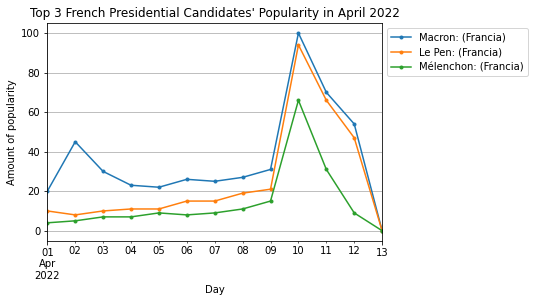

In [155]:
google_trends.plot(style=[".-" for i in range(len(google_trends.columns))],grid=True)
plt.legend(bbox_to_anchor=(1,1))
plt.title("Top 3 French Presidential Candidates' Popularity in April 2022")
plt.xlabel("Day")
plt.ylabel("Amount of popularity")
plt.show()

and when we take a look at the bar graph regarding the votes, the top 3 matches exactly the time series:

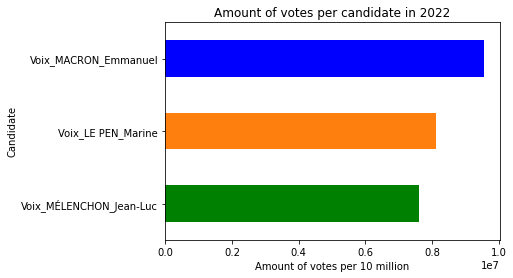

In [156]:
votes_dep.sum(axis=1).sort_values(ascending=False).head(3).sort_values().plot(kind="barh",color=["g",'tab:orange',"b"])
plt.title("Amount of votes per candidate in 2022")
plt.ylabel("Candidate")
plt.xlabel("Amount of votes per 10 million")
plt.show()

**Note**: An interesting fact is that when we look up on Google Trends the first name and last name of the three candidates, we get that the relationship inverts, and we get ``Mélenchon`` first, ``Le pen`` second and ``Macron`` last.